<center>
    <h1>TP4</h1>
    <h2>Clustering de données</h2>
</center>

## K-Moyennes

In [2]:
from sklearn import *
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [87]:
def d_euclidean(A,B):
    return metrics.pairwise.euclidean_distances([A],[B])

In [110]:
from scipy.spatial.distance import euclidean
def k_moyennes(data, k, max_iter = 100):
    n_iter = 0
    centroids = {}
    for i in range(k): centroids[i] = data[i]
    for i in range(max_iter):
        classes = {}
        targets = []
        for j in range(k):
            classes[j] = []
        for j in range(len(data)):
            distances = [d_euclidean(data[j], centroids[cen]) for cen in centroids]
            classe = np.argmin(distances)
            classes[classe].append(data[j])
            targets.append(classe)
        prev_centroids = dict(centroids)
        for classe in classes:
            centroids[classe] = np.mean(classes[classe], axis=0)
        
        for c in centroids:
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
        
        ccens = np.array([v for v in centroids.values()])
        pcens = np.array([v for v in prev_centroids.values()])
        n_iter += 1
        
        if (ccens == pcens).all():
            break
        
    for k,v in classes.items(): classes[k] = np.array(v)
    return targets, n_iter

targets, n_iter = k_moyennes(X,3)
print(targets)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]


In [105]:
def get_meilleur_score():
    scores = []
    for i in range(2, 11):
        for j in range(10):
            kmeans = cluster.KMeans(n_clusters=i).fit(X)
            pred = kmeans.fit_predict(X)
            score = metrics.silhouette_score(X, pred)
            scores.append((j+1,i,score))
            #print(f"{k} - Pour {i} clusters, score = {score}")
    scores.sort(key = lambda x:x[2], reverse=True)
    return scores[0]

In [106]:
(iterations, n_clusters, score) = get_meilleur_score()

In [107]:
print(f"le meilleur score = {score} dont le nombre des clusters est {n_clusters} dans l'iteration numero {iterations}")

le meilleur score = 0.681046169211746 dont le nombre des clusters est 2 dans l'iteration numero 1


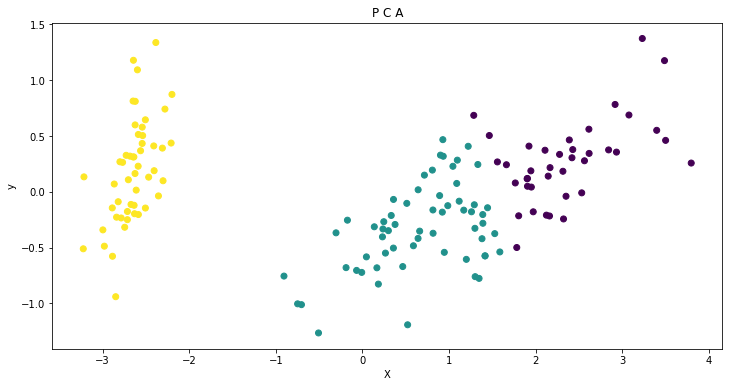

In [111]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
lda = LDA(n_components=2)

irisPCA = pca.fit(X).transform(X)
irisLDA = lda.fit(X,targets).transform(X)

plt.figure(figsize=(12,6))
plt.scatter(irisPCA[:,0], irisPCA[:,1], c=targets)
plt.title('P C A')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

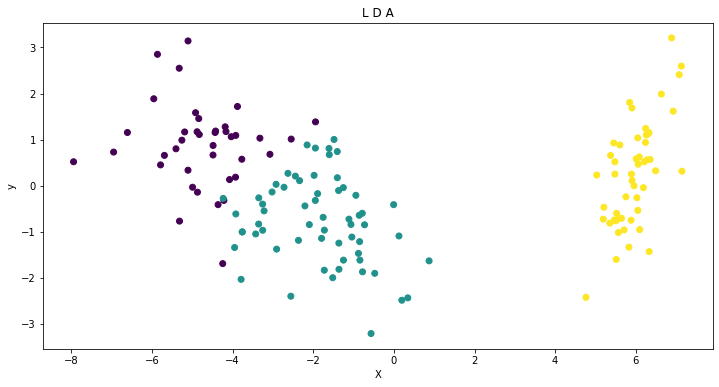

In [112]:
plt.figure(figsize=(12,6))
plt.scatter(irisLDA[:,0], irisLDA[:,1], c=targets)
plt.title('L D A')
plt.xlabel('X')
plt.ylabel('y')
plt.show()